## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(columns=["EIN", "NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_column= application_df["APPLICATION_TYPE"].value_counts()
application_column

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace= application_column[application_column < 500].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
class_column=application_df["CLASSIFICATION"].value_counts()
class_column.head()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace=class_column[class_column < 800].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Generating categorical variable list
application_ctg= application_df.dtypes[application_df.dtypes =="object"].index.tolist()
application_df[application_ctg].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
new_app_df = pd.get_dummies(data=application_df, columns=['APPLICATION_TYPE','INCOME_AMT', 'AFFILIATION','CLASSIFICATION','USE_CASE','ORGANIZATION','SPECIAL_CONSIDERATIONS'])
new_app_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0


In [11]:
# Split our preprocessed data into our features and target arrays
y= new_app_df["IS_SUCCESSFUL"].values
X= new_app_df.drop(columns= ["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=30)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
print(len(new_app_df.columns))

44


## Compile, Train and Evaluate the Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features= len(X_train[0])
hidden_layers1= 30
hidden_layers2= 25
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layers1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layers2, input_dim=number_input_features, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1320      
                                                                 
 dense_1 (Dense)             (None, 25)                775       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2,121
Trainable params: 2,121
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model

import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

In [16]:
# Train the model
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

fit_model= nn.fit(X_train_scaled, y_train, epochs=100, verbose=1, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5736 - accuracy: 0.7186
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5545 - accuracy: 0.7313
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5514 - accuracy: 0.7319
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5497 - accuracy: 0.7332
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5484 - accuracy: 0.7332
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5473 - accuracy: 0.7336
Epoch 7/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5460 - accuracy: 0.7351
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5454 - accuracy: 0.7357
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5447 - accuracy: 0.7360
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5447 - accura

804/804 [==============================] - 2s 3ms/step - loss: 0.5358 - accuracy: 0.7412
Epoch 82/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5349 - accuracy: 0.7418
Epoch 83/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5352 - accuracy: 0.7401
Epoch 84/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5352 - accuracy: 0.7418
Epoch 85/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5354 - accuracy: 0.7407
Epoch 86/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5357 - accuracy: 0.7403
Epoch 87/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5345 - accuracy: 0.7413
Epoch 88/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5351 - accuracy: 0.7418
Epoch 89/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5347 - accuracy: 0.7407
Epoch 90/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5348 - accuracy: 

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5639 - accuracy: 0.7212 - 417ms/epoch - 2ms/step
Loss: 0.563872754573822, Accuracy: 0.72116619348526


<AxesSubplot:>

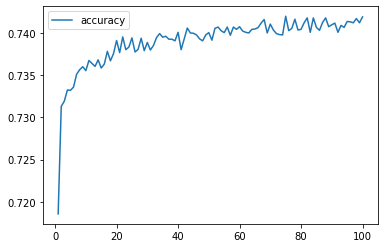

In [18]:

history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"]))
history_df.plot(y="accuracy")

In [20]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")